In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [0]:
downloaded = drive.CreateFile({'id':"1MkKmS-yZ1kNwEVOMzM1PAgbYZcy7AYIW"}) 
downloaded.GetContentFile('dataset1.pkl')
downloaded = drive.CreateFile({'id':"1qu9qUJj9JP1cdVcyKUf4H57_3zs4Vj0X"}) 
downloaded.GetContentFile('dataset2.pkl')
downloaded = drive.CreateFile({'id':"1fg-2QGeVjCW1Tek1aVYf9jglNXgCzDyX"}) 
downloaded.GetContentFile('dataset3.pkl')


# Load and Save File

In [0]:
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
from matplotlib import style
import numpy as np
import pickle
import math
from scipy.stats import norm
np.random.seed(0)

def load(name):
	file = open(name,'rb')
	data = pickle.load(file)
	file.close()
	return data

# GMM Helper Class

In [0]:


class GMM1D:
	def __init__(self,X,iterations,initmean,initprob,initvariance):
		self.iterations = iterations
		self.tempr = None
		self.X = X
		self.mu = initmean
		self.pi = initprob
		self.var = initvariance
	
	"""E step"""

	def calculate_prob(self,r):
		# print(r)
		for c,g,p in zip(range(3),[norm(loc=self.mu[0],scale=self.var[0]),
									   norm(loc=self.mu[1],scale=self.var[1]),
									   norm(loc=self.mu[2],scale=self.var[2])],self.pi):
			# print(p*(g.pdf(self.X).flatten()))
			r[:,c] = (p*g.pdf(self.X))

		self.tempr = r.copy()
		for i in range(len(r)):
			den = 0
			for k in range(0,r.shape[1]):
				den = den + self.pi[k]*r[i,k]

			for j in range(0,r.shape[1]):
				num = self.pi[j] * r[i,j]
				r[i,j] = num/den + 0.000000000001

		return r

	def cal(self,r,i):
		summ = 0
		for j in range(0,len(r)):
			# print(r[j,i],self.X[j])
			summ = summ + r[j,i]*self.X[j]

		return summ

	def maxlikelihood(self,r):
		finalsum = 0.0
		for j in range(0,len(self.tempr)):
			summ=0.0
			for k in range(0,len(self.pi)):
				summ = summ + self.tempr[j,k]*self.pi[k]
			finalsum = finalsum + math.log(summ,10)
		return finalsum

	def run(self):
		result = []
		for iter in range(self.iterations):
			r = np.zeros((len(self.X),3))
			r = self.calculate_prob(r)
			
			self.plot(r)

			result.append(self.maxlikelihood(r))

			rshape = r.shape
			temp_pi=[]
			for i in range(0,rshape[1]):
				temp_pi.append(np.sum(r[:,i]))


			for i in range(0,len(self.mu)):
				self.mu[i] = self.cal(r,i)/np.sum(r[:,i])
				self.mu[i] = self.mu[i] + 0.000000000001

			for i in range(0,len(self.var)):
				temp = np.square(self.X - self.mu[i])
				for j in range(0,len(temp)):
					temp[j] = temp[j]*r[j,i]

				temp = np.sum(temp)
				# print(temp)
				temp = temp/temp_pi[i]
				temp = math.sqrt(temp)
				self.var[i] = temp
				self.var[i] = self.var[i] + 0.000000000001

			N_sum = sum(temp_pi)
			for i in range(0,len(self.pi)):
				self.pi[i] = temp_pi[i] / N_sum
				self.pi[i] = self.pi[i] + 0.000000000001

			plt.show()
			print(iter)
			# print(self.mu)
			# print(self.pi)
			# print(self.var)
			print("--------")
		return result

	def plot(self,r):
		fig = plt.figure(figsize=(10,10))
		ax0 = fig.add_subplot(111)
		for i in range(len(r)):
			ax0.scatter(self.X[i],0,c=np.array([r[i][0],r[i][1],r[i][2]]),s=100)
			"""Plot the gaussians"""
		for g,c in zip([norm(loc=self.mu[0],scale=self.var[0]).pdf(np.linspace(-20,20,num=60)),norm(loc=self.mu[1],scale=self.var[1]).pdf(np.linspace(-20,20,num=60)),norm(loc=self.mu[2],scale=self.var[2]).pdf(np.linspace(-20,20,num=60))],['r','g','b']):
			ax0.plot(np.linspace(-20,20,num=60),g,c=c)



# Data_Set_1

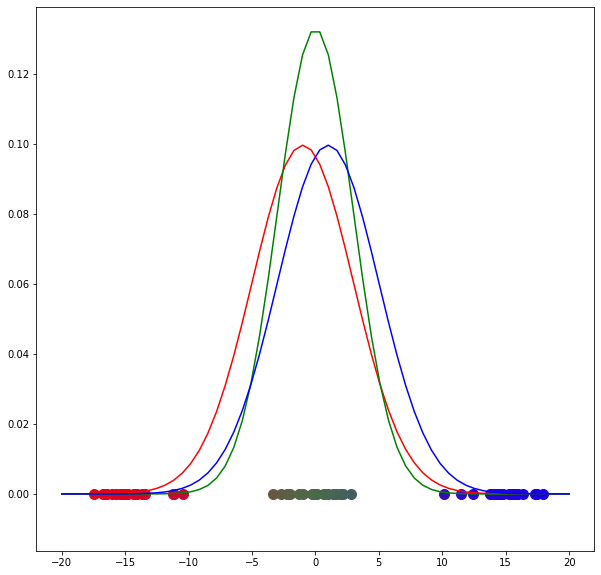

0
--------


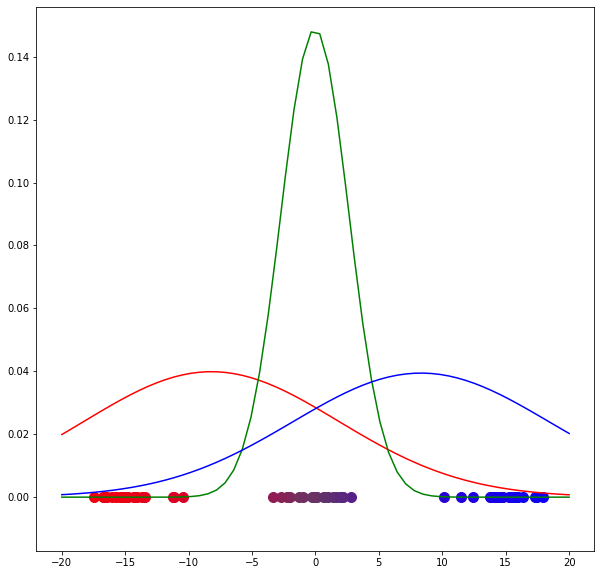

1
--------


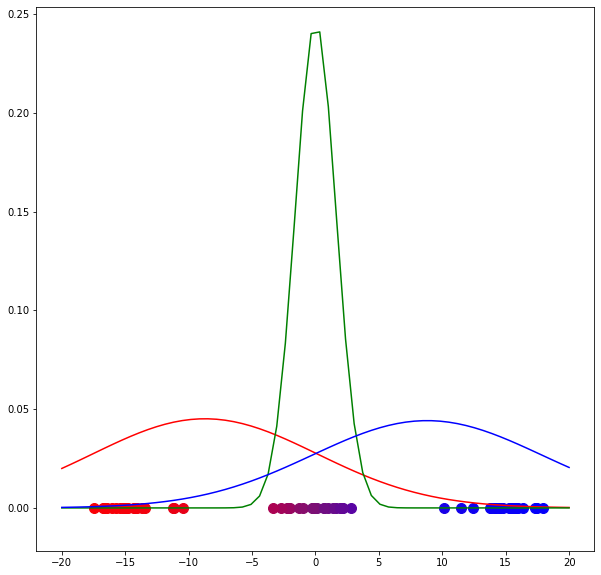

2
--------


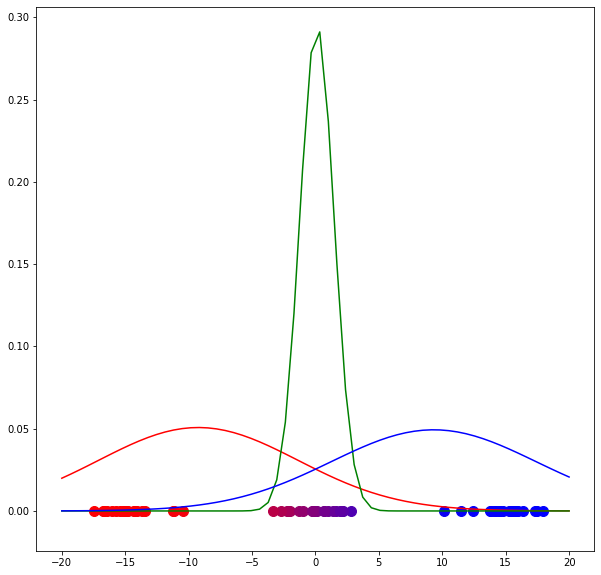

3
--------


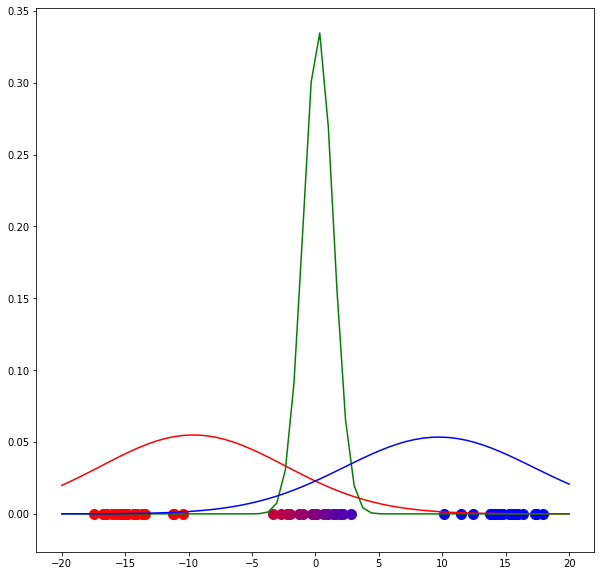

4
--------


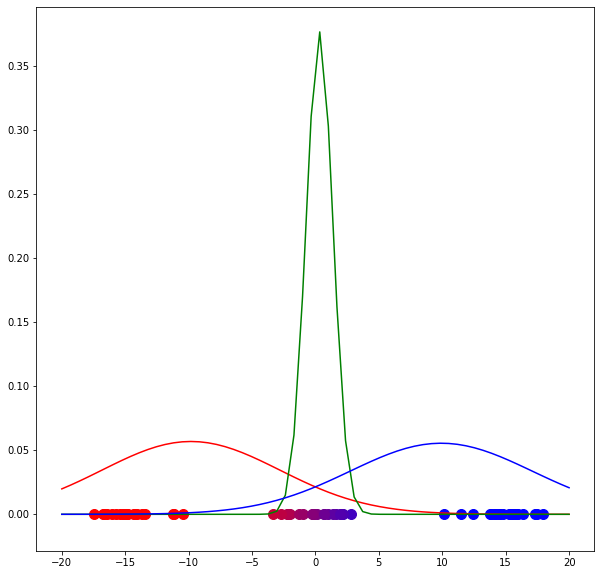

5
--------


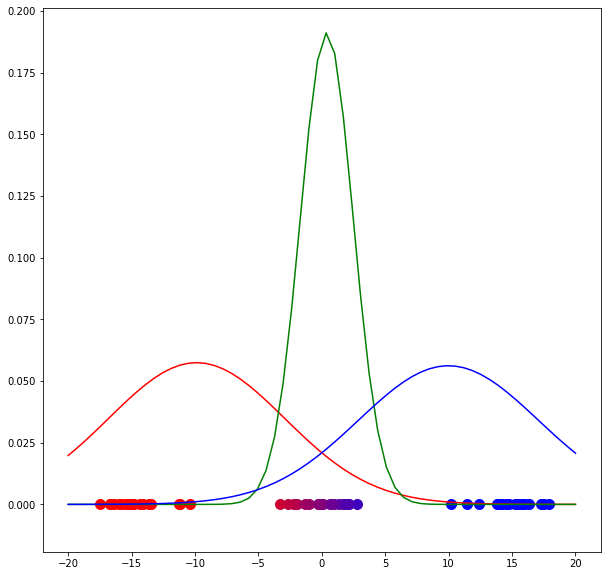

6
--------


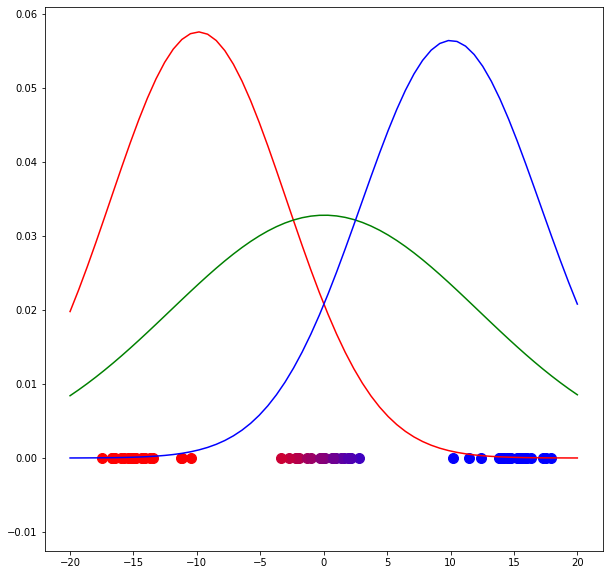

7
--------


In [51]:
data1 = load("dataset1.pkl")
# mean1 = np.mean(data1)
data = np.reshape(data1,60)
g = GMM1D(data,8,[-1,0,1],[1/3,1/3,1/3],[4,3,4])
result = g.run()

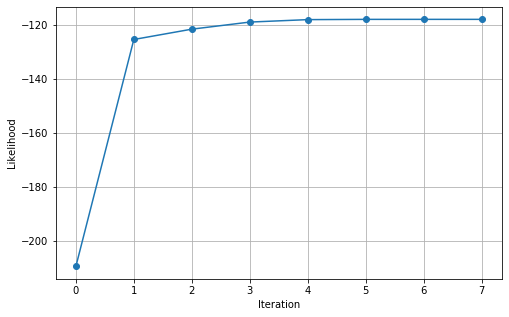

In [52]:
plt.figure(figsize=(8,5))
iteration = np.arange(len(result))
plt.grid(True)
plt.xlabel("Iteration")
plt.ylabel("Likelihood")
plt.plot(iteration,result,marker="o")

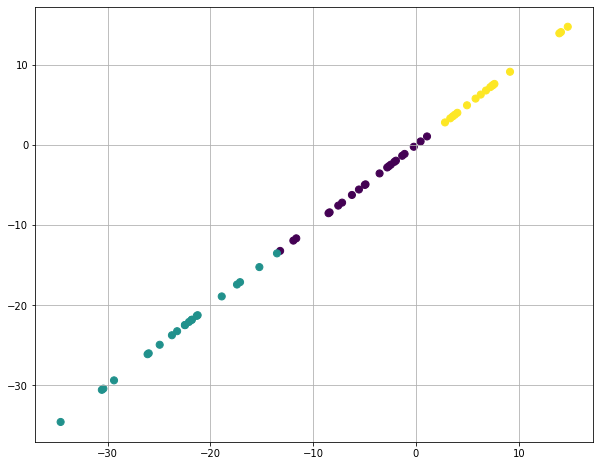

In [80]:
from sklearn.mixture import GaussianMixture
data = data.reshape((-1,1))
gmm = GaussianMixture(n_components=3).fit(data)
prediction_gmm = gmm.predict(data)
plt.figure(figsize = (10,8))
plt.grid(True)
plt.scatter(data[:, 0], data[:, 0],c=prediction_gmm ,s=50, cmap='viridis')
plt.show()

#Data_Set_2

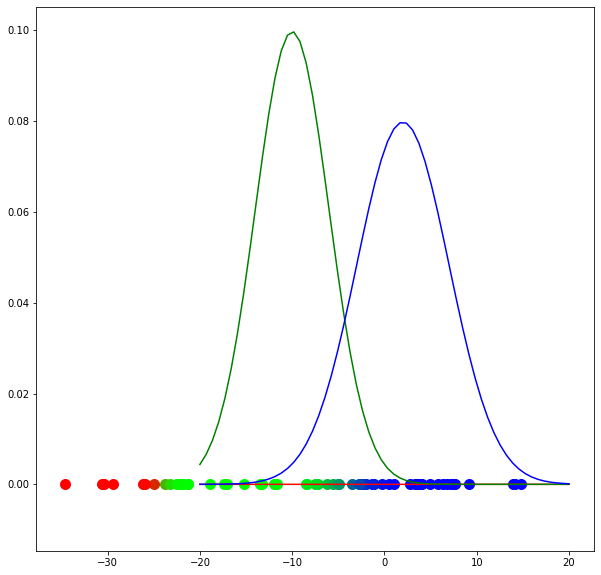

0
--------


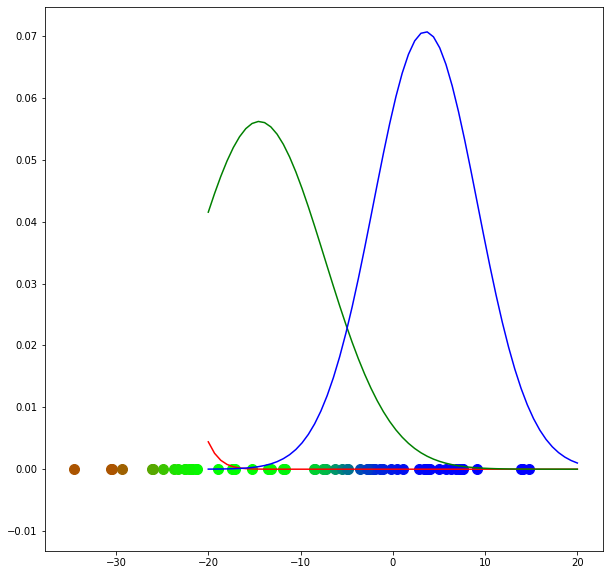

1
--------


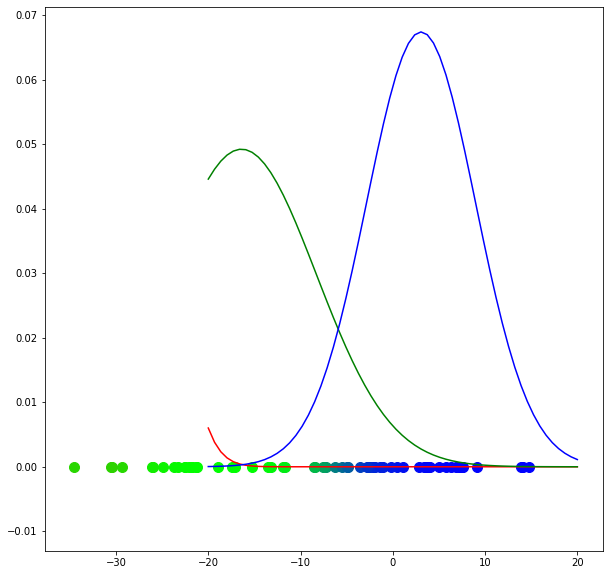

2
--------


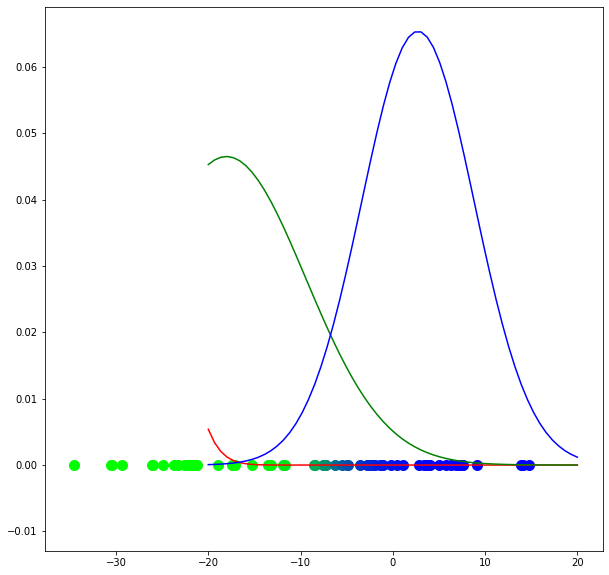

3
--------


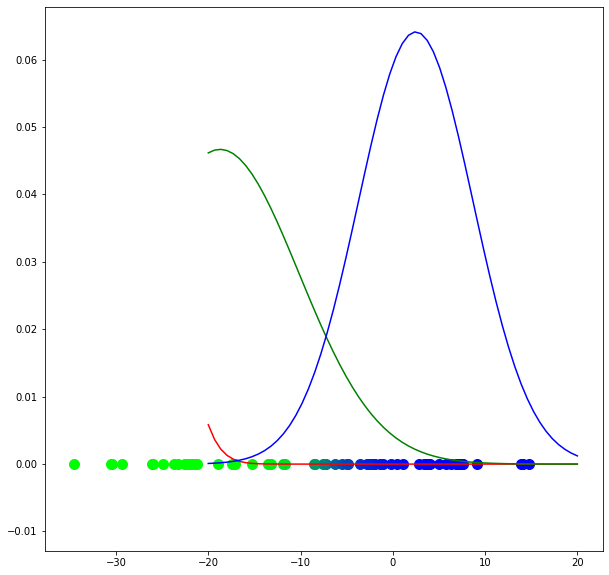

4
--------


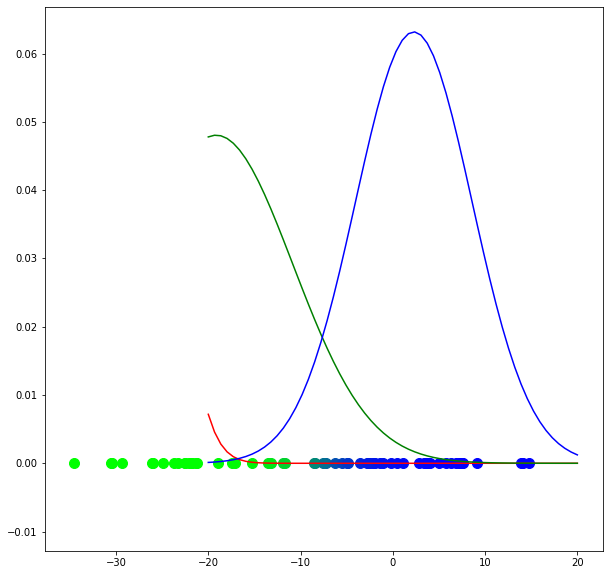

5
--------


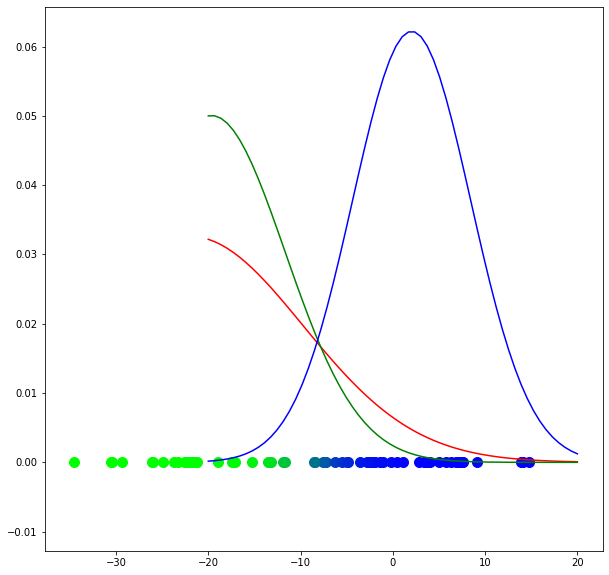

6
--------


In [75]:
data2 = load("dataset2.pkl")
data = np.reshape(data2,60)
g = GMM1D(data,7,[-35,-10,2],[1/3,1/3,1/3],[3,4,5])
result = g.run()

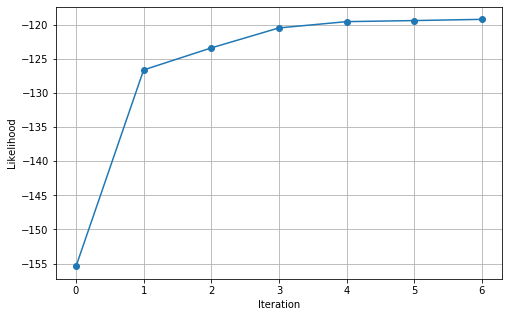

In [76]:
plt.figure(figsize=(8,5))
iteration = np.arange(len(result))
plt.grid(True)
plt.xlabel("Iteration")
plt.ylabel("Likelihood")
plt.plot(iteration,result,marker="o")

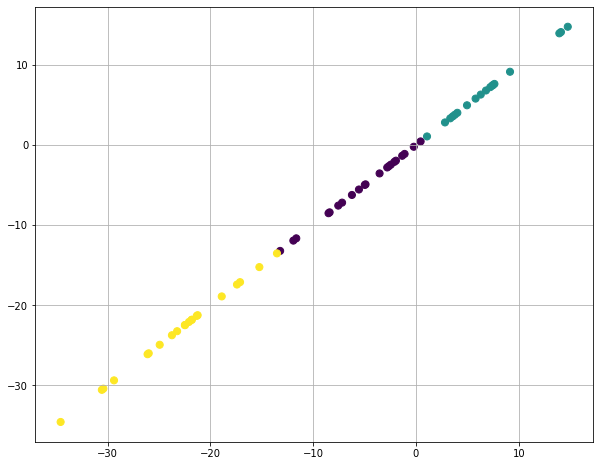

In [81]:
from sklearn.mixture import GaussianMixture
data = data.reshape((-1,1))
gmm = GaussianMixture(n_components=3).fit(data)
prediction_gmm = gmm.predict(data)
plt.figure(figsize = (10,8))
plt.grid(True)
plt.scatter(data[:, 0], data[:, 0],c=prediction_gmm ,s=50, cmap='viridis')
plt.show()

# Data_set_3

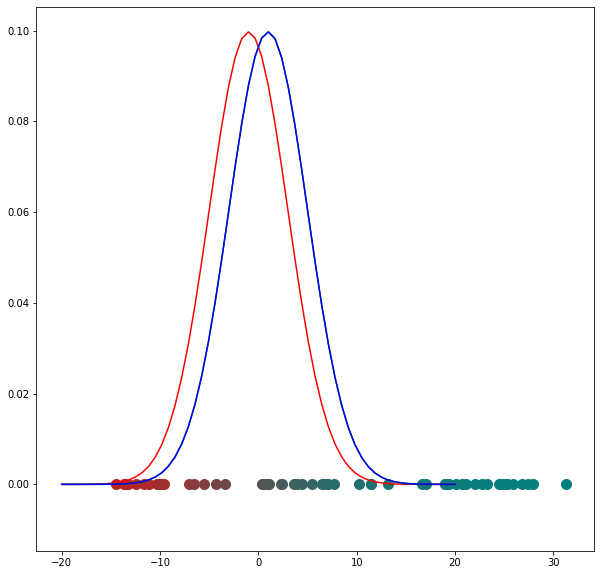

0
--------


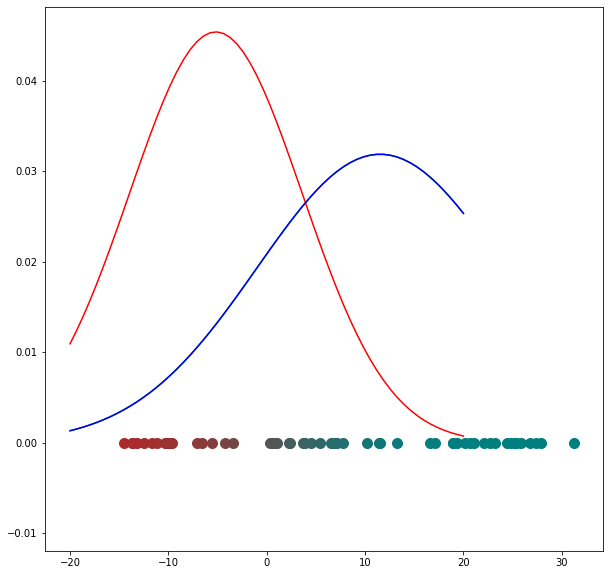

1
--------


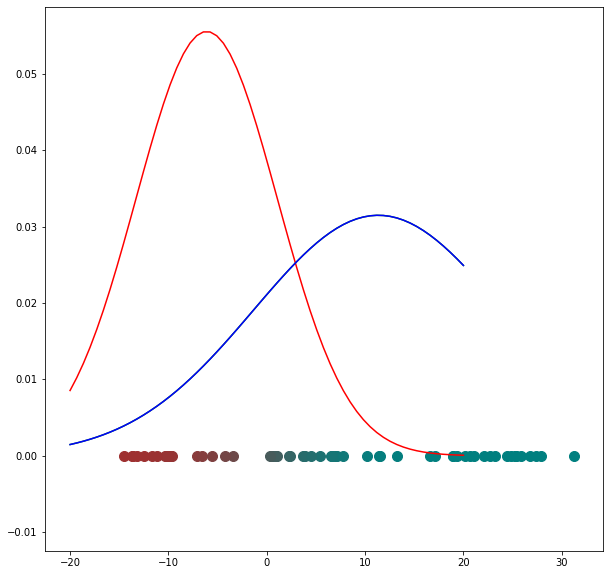

2
--------


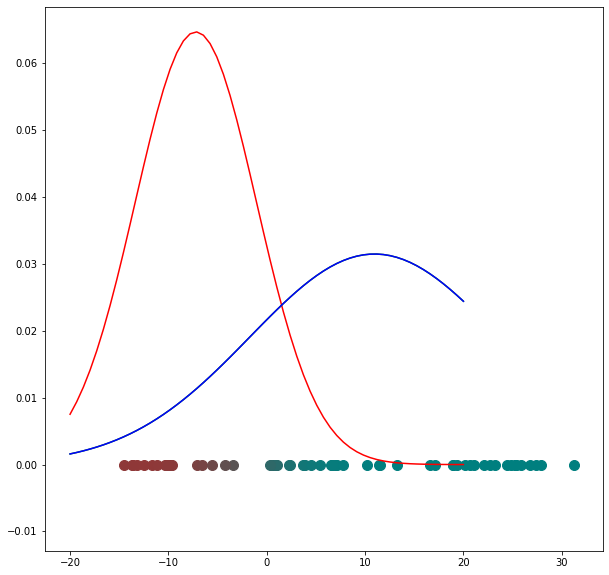

3
--------


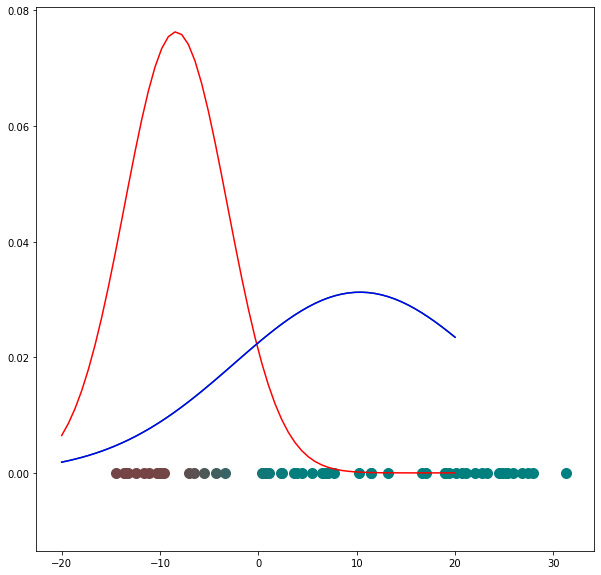

4
--------


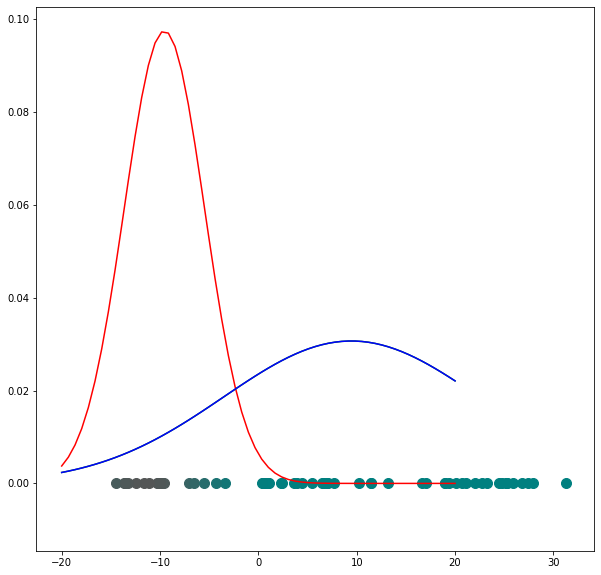

5
--------


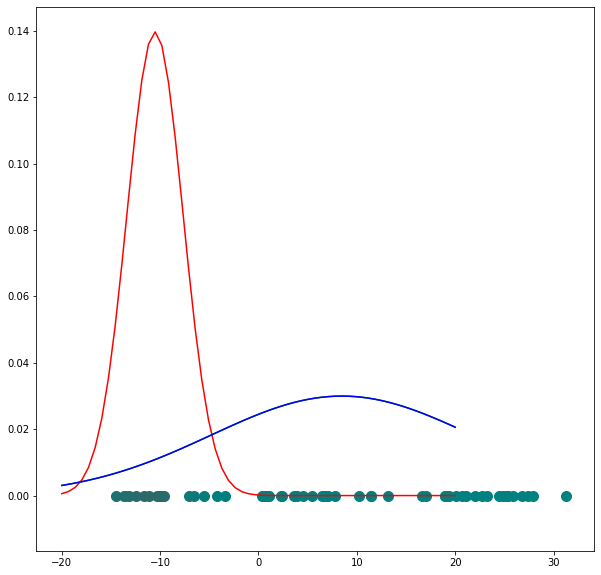

6
--------


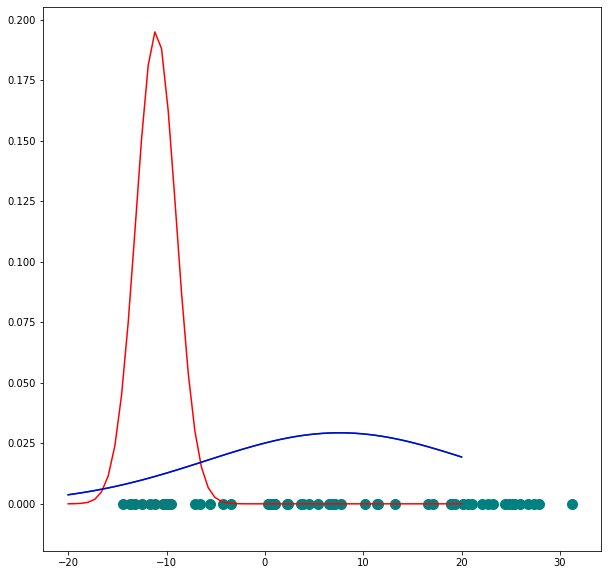

7
--------


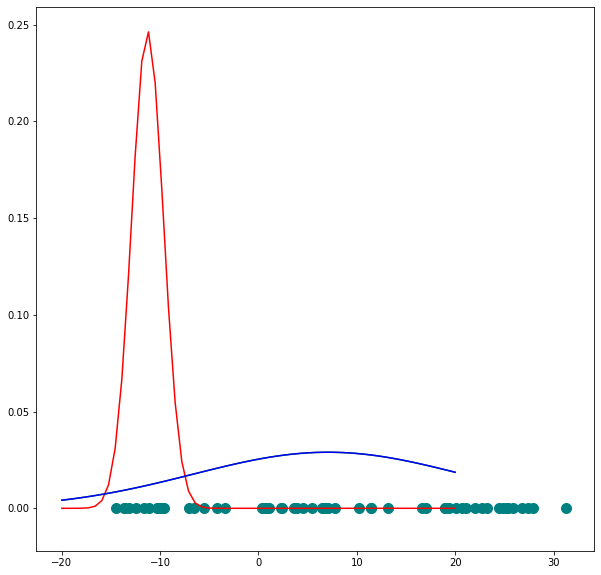

8
--------


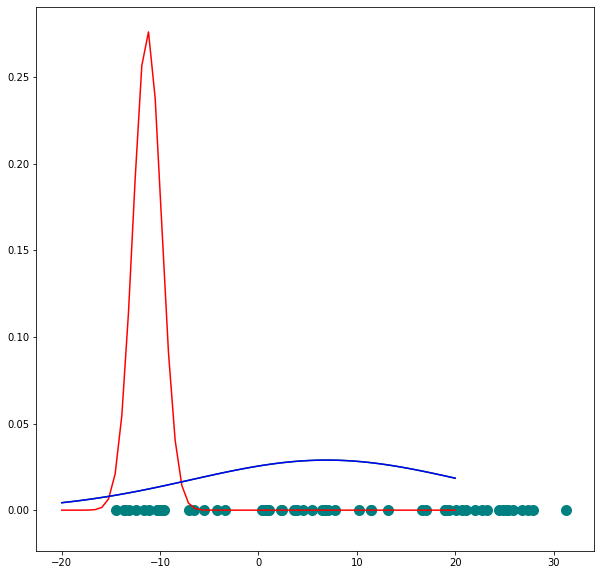

9
--------


In [72]:
data3 = load("dataset3.pkl")
data = np.reshape(data3,60)
g = GMM1D(data,10,[-1,1,1],[1/3,1/3,1/3],[4,4,4])
# g = GMM1D(data,10,[-1,1,1],[1/3,1/3,1/3],[1,2,3])
result = g.run()

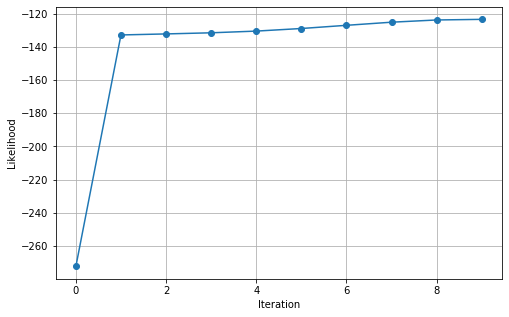

In [73]:
plt.figure(figsize=(8,5))
iteration = np.arange(len(result))
plt.grid(True)
plt.xlabel("Iteration")
plt.ylabel("Likelihood")
plt.plot(iteration,result,marker="o")

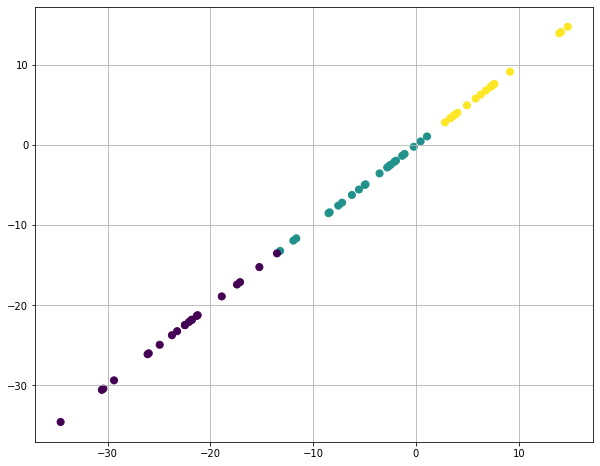

In [82]:
from sklearn.mixture import GaussianMixture
data = data.reshape((-1,1))
gmm = GaussianMixture(n_components=3).fit(data)
prediction_gmm = gmm.predict(data)
plt.figure(figsize = (10,8))
plt.grid(True)
plt.scatter(data[:, 0], data[:, 0],c=prediction_gmm ,s=50, cmap='viridis')
plt.show()

#Complete DataSet

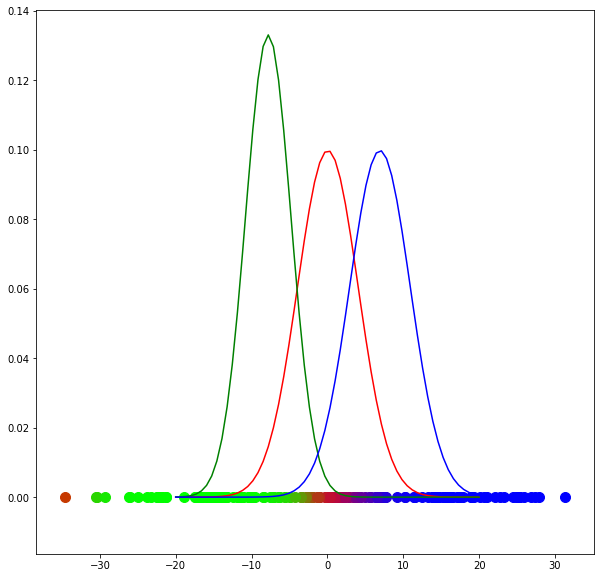

0
--------


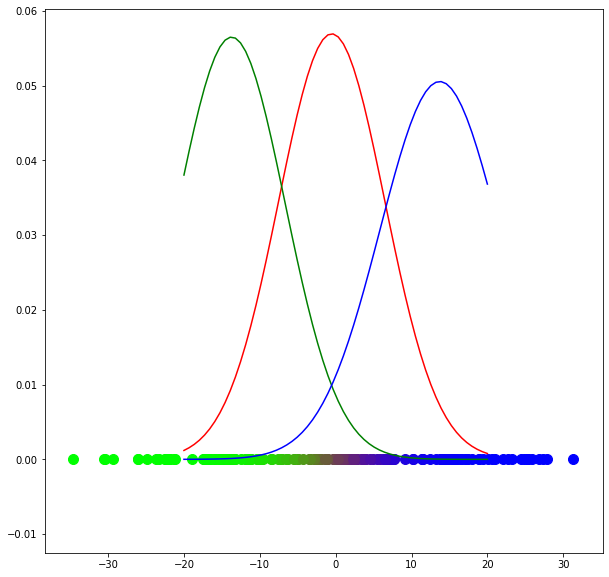

1
--------


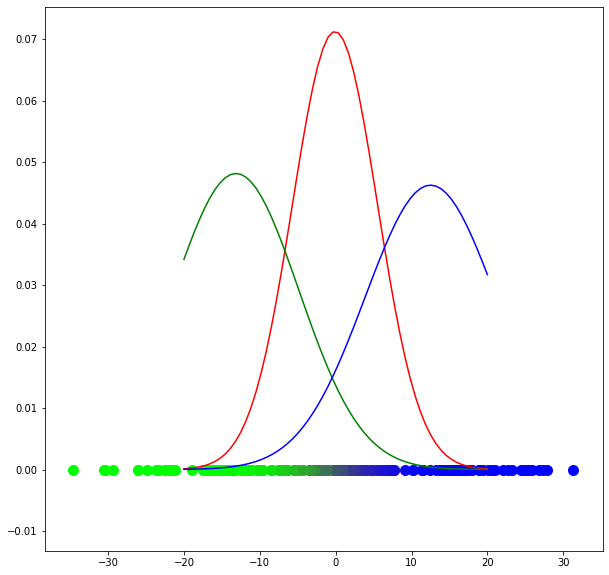

2
--------


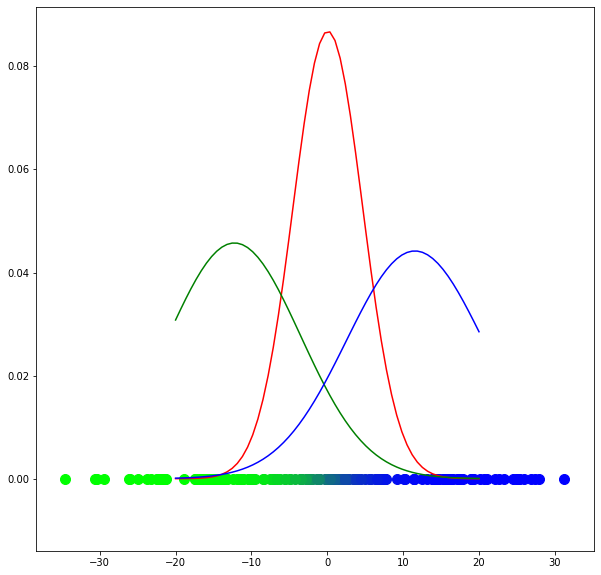

3
--------


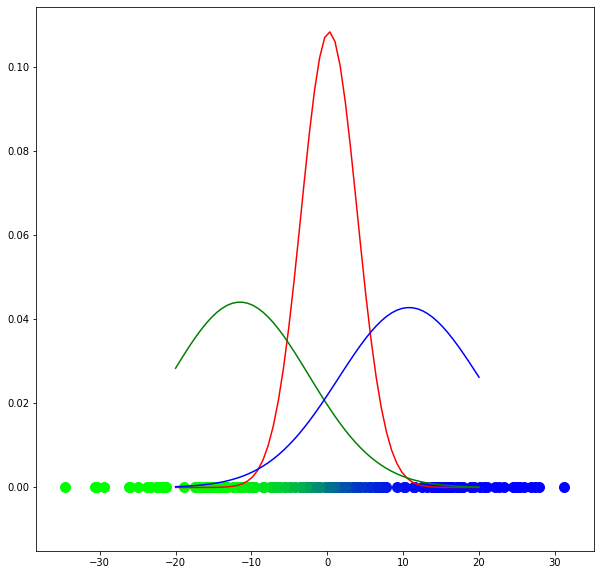

4
--------


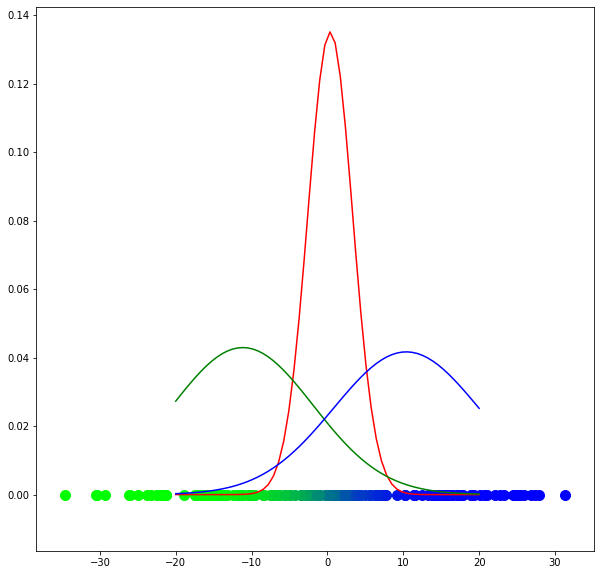

5
--------


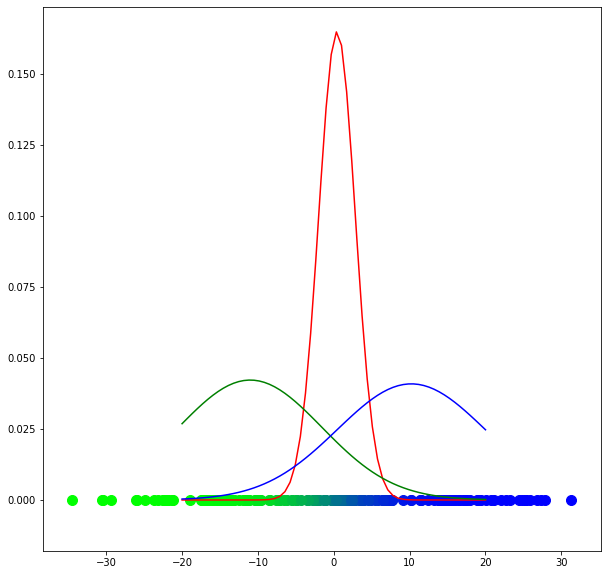

6
--------


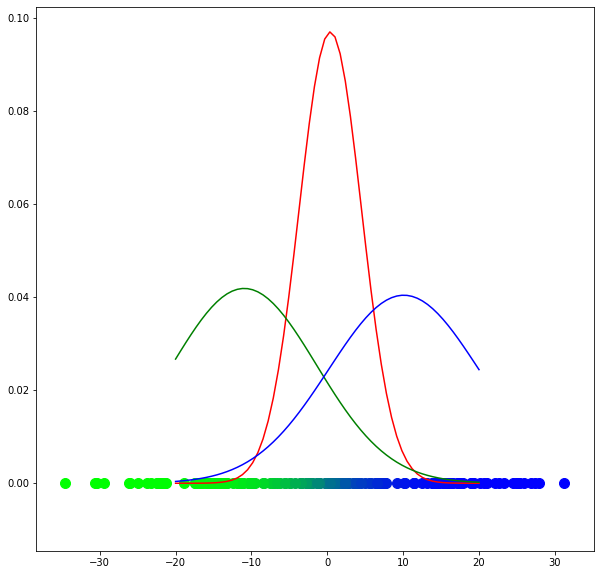

7
--------


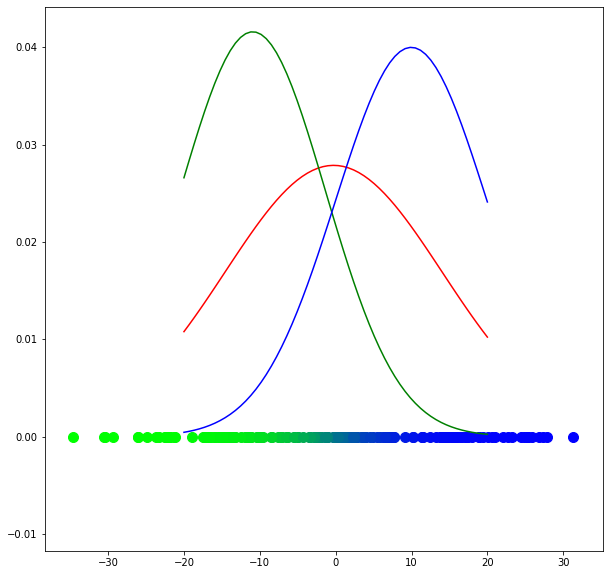

8
--------


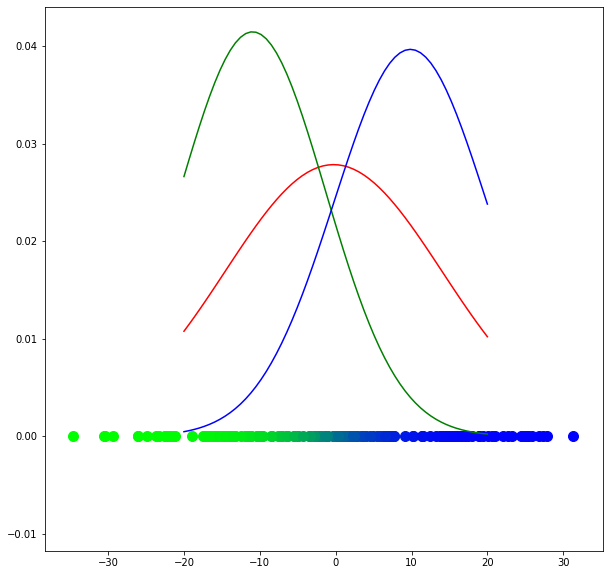

9
--------


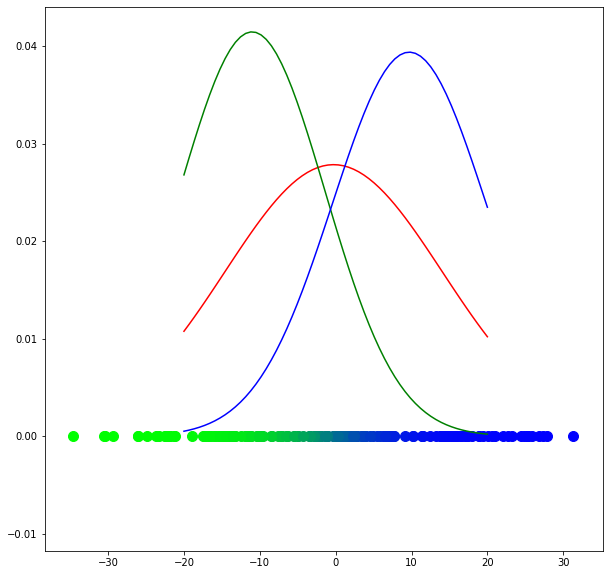

10
--------


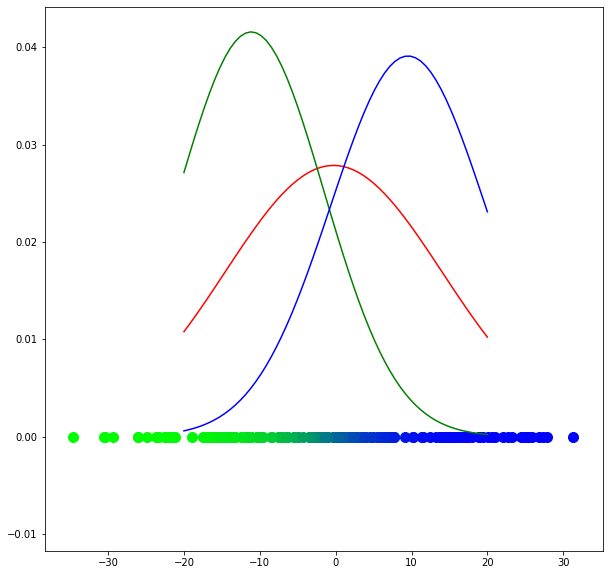

11
--------


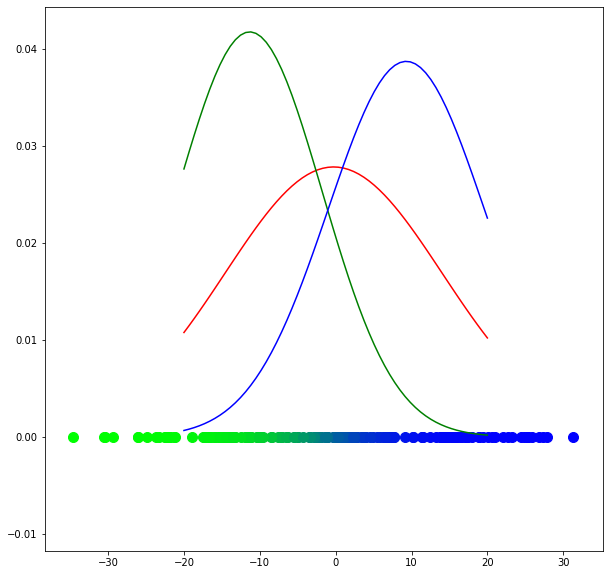

12
--------


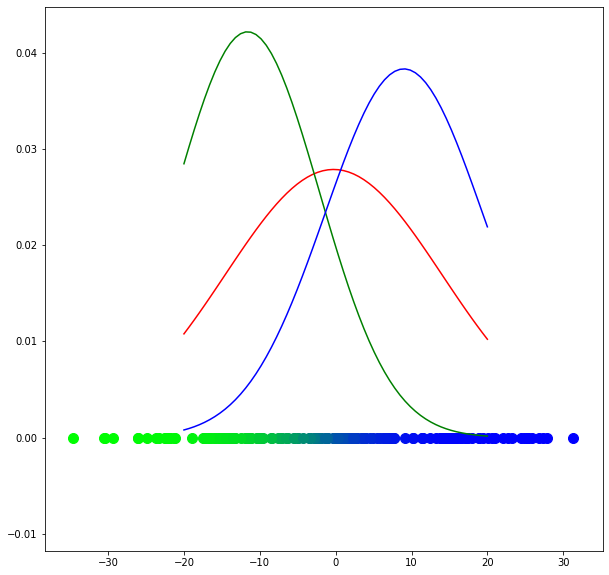

13
--------


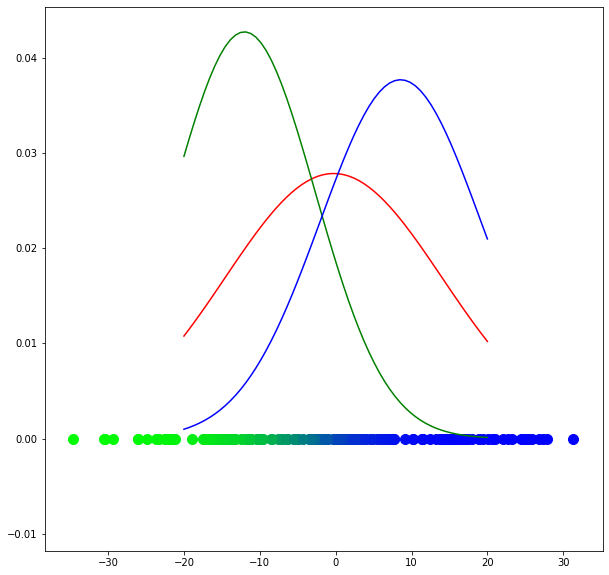

14
--------


In [49]:
data1 = load("dataset1.pkl")
data2 = load("dataset2.pkl")
data3 = load("dataset3.pkl")
mean1 = np.mean(data1)
mean2 = np.mean(data2)
mean3 = np.mean(data3)

data = np.reshape(np.concatenate((data1,data2,data3)),180)
g = GMM1D(data,15,[mean1,mean2,mean3],[1/3,1/2,1/3],[4,3,4])
result = g.run()

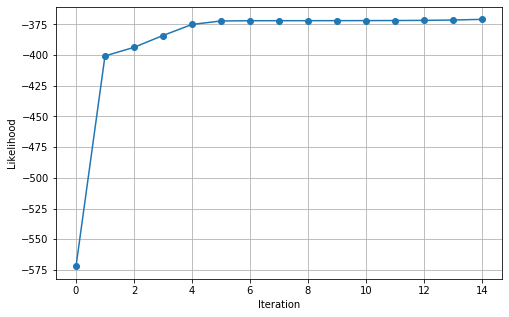

In [50]:
plt.figure(figsize=(8,5))
iteration = np.arange(len(result))
plt.grid(True)
plt.xlabel("Iteration")
plt.ylabel("Likelihood")
plt.plot(iteration,result,marker="o")

In [0]:
#Sklearn GMM

(180, 1)


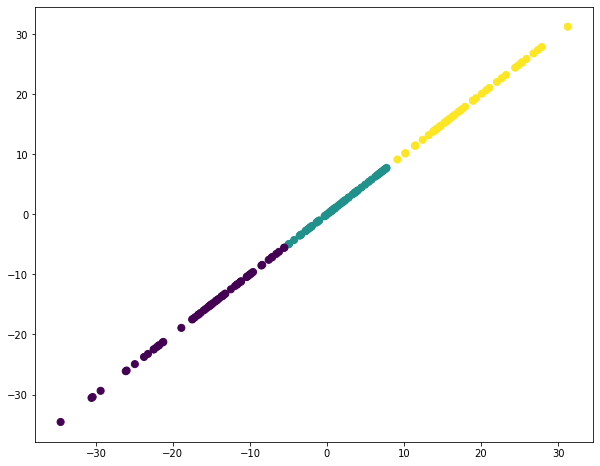

In [0]:
from sklearn.mixture import GaussianMixture
# sklearn_pca = PCA(n_components = 2)
data = data.reshape((-1,1))
gmm = GaussianMixture(n_components=3).fit(data)
prediction_gmm = gmm.predict(data)
probs = gmm.predict_proba(data)
print(data.shape)
centers = np.zeros((3,2))

plt.figure(figsize = (10,8))
plt.scatter(data[:, 0], data[:, 0],c=prediction_gmm ,s=50, cmap='viridis')